# Visualisation of Performance of Pytorch calculations

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [ ]:
tf_files_dir = "/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/"
dataset = "cifar100"
main_dir = os.path.join(tf_files_dir, dataset)
for config_name in os.listdir(main_dir)[1:2]:
    total_path = os.path.join(tf_files_dir, dataset, config_name)
    eventfile_name = os.listdir(total_path)[1]

    # Is this correct? I took this part of code from another website.
    DEFAULT_SIZE_GUIDANCE = {
            "compressedHistograms": 1,
            "images": 1,
            "scalars": 0,  # 0 means load all
            "histograms": 1,
        }

    event_acc = EventAccumulator(total_path, DEFAULT_SIZE_GUIDANCE)
    event_acc.Reload()

    for tag in event_acc.Tags()['scalars']:
        values = event_acc.Scalars(tag)

        values_np = np.zeros((len(values), 1))

        for ti, tl in enumerate(values):
            values_np[ti,0] = tl.value

        numpy_save_dir = '/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/numpy_save100/'
        new_tag = tag.replace('/','_')
        value_dir = os.path.join(numpy_save_dir, new_tag)
        print(value_dir)
        if not os.path.exists(value_dir):
            os.mkdir(value_dir)

        file_name = os.path.join(value_dir, config_name)
        np.save(file_name, values_np)


/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/numpy_save100/Loss_train
/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/numpy_save100/Accuracy_train
/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/numpy_save100/Loss_test
/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/numpy_save100/Accuracy_test


In [ ]:
tf_files_dir = "/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/"
dataset = "cifar100"
main_dir = os.path.join(tf_files_dir, dataset)
print(main_dir)

/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100


In [ ]:
os.listdir(main_dir)

['.DS_Store', 'test', 'numpy_save100']

In [ ]:
tf_files_dir = "/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/"
dataset = "cifar100"
main_dir = os.path.join(tf_files_dir, dataset)
for config_name in os.listdir(main_dir)[1:2]:
    total_path = os.path.join(tf_files_dir, dataset, config_name)
    eventfile_name = os.listdir(total_path) #[1]

    print('total_path:', total_path)
    print('eventfile_name:', eventfile_name)

total_path: /Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/test
eventfile_name: ['events.out.tfevents.1645283216.r30n3.lisa.surfsara.nl.20504.0', 'events.out.tfevents.1644329437.Davids-MBP.domain.name.2897.0', 'events.out.tfevents.1644327637.Davids-MBP.domain.name.2754.0', 'events.out.tfevents.1644394506.Davids-MBP.domain.name.1294.0', 'events.out.tfevents.1645282032.r30n1.lisa.surfsara.nl.4804.0']


In [ ]:
total_path = os.path.join(tf_files_dir, dataset, config_name)
total_path

'/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/test'

In [ ]:
tf_files_dir = "/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/"
dataset = "cifar100"
main_dir = os.path.join(tf_files_dir, dataset)
test = os.listdir(main_dir)

test

['.DS_Store', 'test', 'numpy_save100']

# Visualisation

In [ ]:
acc_test = np.load("/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/numpy_save100/Accuracy_test/test.npy")
acc_train = np.load("/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/numpy_save100/Accuracy_train/test.npy")
loss_test = np.load("/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/numpy_save100/Loss_test/test.npy")
loss_train = np.load("/Users/dj/Documents/GitHub/Master_Thesis/Code/data/runs/cifar100/numpy_save100/Loss_train/test.npy")

x_train = np.arange(1,len(loss_train) + 1)
x_test = np.arange(1,len(loss_test) + 1)

Text(0.5, 1.0, 'Loss Train')

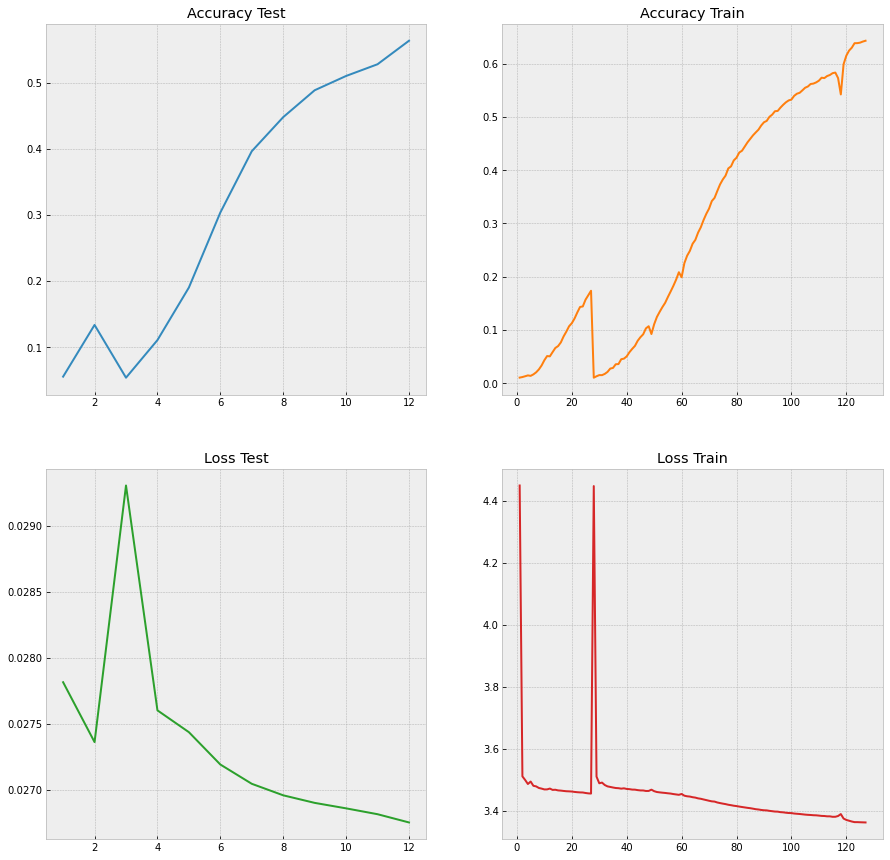

In [ ]:
style.use('bmh')

fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].plot(x_test, acc_test)
axs[0, 0].set_title('Accuracy Test', color='black')
axs[0, 1].plot(x_train, acc_train, 'tab:orange')
axs[0, 1].set_title('Accuracy Train', color='black')
axs[1, 0].plot(x_test, loss_test, 'tab:green')
axs[1, 0].set_title('Loss Test', color='black')
axs[1, 1].plot(x_train, loss_train, 'tab:red')
axs[1, 1].set_title('Loss Train', color='black')
#fig.tight_layout()